National University Thesis: HRS Study Logistic Regression study
====

Introduction
====

This jupyter notebook is focused on doing the initial study on the relation of COVID-19 and Self-Assessed Health (SAH) in the year of 2021 with the "high-risk" (55+) population. This study will use the 2021 Health and Retirement Study that conducted its study from March 2020 - May 2021. The variable of interest is a multi-nominal ordinal categorical outcome with outputs ranging from: 1-5 (Poor to Excellent). This research will transform the target variable to a binary output of 0 poor health(1-2) and good health (3-5).  Past scholarly research has modeled this to effectively look at the effect size of health. This process willl include: Downloading the data, data wrangling, doing an EDA for descriptive statistics, splitting the data for validation, fitting the model, and looking at the accuracy metrics for evaluation. The metric resulting from this study will be compared with other studies to look for the change in: model accuracy, precision, recall, f-1, log odds and coefficients

Importing Libraries
====

In [3]:
#Normal Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sc

#Train/Test or CV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict

#DataWrangling
from scipy import stats
from scipy.stats.mstats import normaltest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

#Accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

Importing Data
====

In [4]:
#import filetype
df1 = pd.read_csv(r"C:\Users\2-1\Documents\NU Classes\ANA699ABC\Data\cognition.csv")

In [5]:
df1 = df1.dropna(thresh=df1.shape[0]*0.6,how='all',axis=1)

In [6]:
df2 = pd.read_csv(r"C:\Users\2-1\Documents\NU Classes\ANA699ABC\Data\coverscreen.csv")

In [7]:
df2 = df2.dropna(thresh=df2.shape[0]*0.6,how='all',axis=1)

In [8]:
df3 = pd.read_csv(r"C:\Users\2-1\Documents\NU Classes\ANA699ABC\Data\covid.csv")

In [9]:
df3 = df3.dropna(thresh=df3.shape[0]*0.6,how='all',axis=1)

In [10]:
df4 = pd.read_csv(r"C:\Users\2-1\Documents\NU Classes\ANA699ABC\Data\demographic.csv")

In [11]:
df4 = df4.dropna(thresh=df4.shape[0]*0.6,how='all',axis=1)

In [12]:
df5 = pd.read_csv(r"C:\Users\2-1\Documents\NU Classes\ANA699ABC\Data\employment.csv")

In [13]:
df5 = df5.dropna(thresh=df5.shape[0]*0.6,how='all',axis=1)

In [14]:
df6 = pd.read_csv(r"C:\Users\2-1\Documents\NU Classes\ANA699ABC\Data\health.csv")

C:\Users\2-1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (151) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
df6 = df6.dropna(thresh=df6.shape[0]*0.6,how='all',axis=1)

In [16]:
df1.head()

,HHID,PN,RSUBHH,QSUBHH,RCSR,RFAMR,RFINR,RD190,RD290,RD101,...,RD242,RD216,RD217,RNSSCORE,RNSSCORESE,RD170,RD171,RDMODE,RVDATE,RVERSION
0,10003,30,0,0,1,1,1,1.0,0.0,1.0,...,1.0,1.0,0.0,995,995,2.0,1.0,1.0,1,1
1,10004,40,1,0,1,1,1,1.0,0.0,3.0,...,1.0,2.0,0.0,995,995,10.0,1.0,1.0,3,1
2,10013,40,1,1,1,1,1,1.0,0.0,3.0,...,-8.0,NaN,NaN,995,995,NaN,1.0,4.0,8,1
3,10038,10,0,0,1,5,1,1.0,0.0,2.0,...,-8.0,NaN,NaN,995,995,NaN,1.0,3.0,7,1
4,10038,40,0,0,5,1,5,1.0,0.0,3.0,...,-8.0,NaN,NaN,995,995,NaN,1.0,3.0,7,1


In [17]:
df1.shape

(15723, 61)

In [18]:
df2.head()

,HHID,PN,RSUBHH,QSUBHH,RCSR,RFAMR,RFINR,RA500,RA501,RA061,...,RA019,RA028,RA099,RA100,RA101,RA106,RA113,RAMODE,RVDATE,RVERSION
0,10003,30,0,0,1,1,1,3,2020,2019,...,64,5,0,0,0,0,0,1.0,1,1
1,10004,40,1,0,1,1,1,4,2020,2019,...,73,5,0,3,3,3,5,1.0,3,1
2,10013,40,1,1,1,1,1,8,2020,2019,...,72,5,0,1,1,1,2,3.0,8,1
3,10038,10,0,0,1,5,1,6,2020,2019,...,83,5,0,2,2,2,4,3.0,7,1
4,10038,40,0,0,5,1,5,6,2020,2019,...,77,5,0,2,2,2,4,3.0,7,1


In [19]:
df2.shape

(15723, 26)

In [20]:
df3.head()

,HHID,PN,RSUBHH,QSUBHH,RCSR,RFAMR,RFINR,RCOVW550,RCOVW551,RCOVW552,...,RCOVW625,RCOVW628,RCOVW631,RCOVW634,RCOVW637,RCOVW640,RCOVW643,RCOVMODE,RVDATE,RVERSION
0,10003,30,0,0,1,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,10004,40,1,0,1,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
2,10013,40,1,1,1,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1
3,10038,10,0,0,1,5,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1
4,10038,40,0,0,5,1,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1


In [21]:
df3.shape

(15723, 28)

In [22]:
df4.head()

,HHID,PN,RSUBHH,QSUBHH,RCSR,RFAMR,RFINR,RX003_R,RX007_R,RZ077_R,...,RZ262,RZ264,RZ265,RZ267,RZ269,RZ270,RZ274,RZ276,RVDATE,RVERSION
0,10003,30,0,0,1,1,1,1,3.0,3.0,...,5.0,NaN,NaN,6.0,5.0,3.0,NaN,1.0,1,1
1,10004,40,1,0,1,1,1,1,3.0,3.0,...,5.0,NaN,5.0,3.0,5.0,2.0,NaN,1.0,3,1
2,10013,40,1,1,1,1,1,1,3.0,3.0,...,5.0,1.0,5.0,4.0,5.0,1.0,1.0,1.0,8,1
3,10038,10,0,0,1,5,1,1,1.0,1.0,...,5.0,1.0,5.0,3.0,5.0,1.0,1.0,1.0,7,1
4,10038,40,0,0,5,1,5,2,2.0,2.0,...,5.0,5.0,1.0,3.0,5.0,3.0,1.0,1.0,7,1


In [23]:
df4.shape

(15723, 149)

In [24]:
df5.head()

,HHID,PN,RSUBHH,QSUBHH,RCSR,RFAMR,RFINR,RJ731,RJ732,RJ005M1,...,RJ963,RJ022,RJ677,RJ689,RJ595,RJ596,RJ650,RJMODE,RVDATE,RVERSION
0,10003,30,0,0,1,1,1,2,2,6.0,...,5.0,4,1,3,10,5.0,1.0,1.0,1,1
1,10004,40,1,0,1,1,1,2,2,5.0,...,5.0,4,1,3,10,5.0,1.0,1.0,3,1
2,10013,40,1,1,1,1,1,2,2,5.0,...,5.0,4,1,3,10,5.0,NaN,3.0,8,1
3,10038,10,0,0,1,5,1,2,2,5.0,...,5.0,4,1,3,10,5.0,NaN,3.0,7,1
4,10038,40,0,0,5,1,5,2,2,5.0,...,5.0,4,1,3,10,5.0,NaN,4.0,7,1


In [25]:
df5.shape

(15723, 21)

In [26]:
df6.head()

,HHID,PN,RSUBHH,QSUBHH,RCSR,RFAMR,RFINR,RC231,RC234,RC235,...,RC147,RC148,RC149,RC229,RC150,RC167,RC183,RCMODE,RVDATE,RVERSION
0,10003,30,0,0,1,1,1,1,0,1,...,5,5,1,0.0,5.0,5.0,1.0,1.0,1,1
1,10004,40,1,0,1,1,1,1,0,1,...,5,5,5,0.0,5.0,5.0,1.0,1.0,3,1
2,10013,40,1,1,1,1,1,1,0,1,...,5,5,5,0.0,5.0,5.0,NaN,3.0,8,1
3,10038,10,0,0,1,5,1,1,0,1,...,5,5,5,0.0,5.0,5.0,NaN,3.0,7,1
4,10038,40,0,0,5,1,5,1,0,1,...,5,5,5,0.0,5.0,5.0,NaN,3.0,7,1


In [27]:
df6.shape

(15723, 69)

In [28]:
df8 = pd.merge(df1, df2)

In [29]:
df9 = pd.merge(df8, df3)

In [30]:
df10 = pd.merge(df9, df4)

In [31]:
df11 = pd.merge(df10, df5)

In [32]:
df12 = pd.merge(df11, df6)

In [33]:
df12.shape

(15723, 309)

# Export Data to Local

In [34]:
df12.to_csv('C:\\Users\\2-1\\Downloads\\HRS.csv')

Merged Data
====

In [35]:
#check top 5 rows
df12.head()

,HHID,PN,RSUBHH,QSUBHH,RCSR,RFAMR,RFINR,RD190,RD290,RD101,...,RC145,RC146,RC147,RC148,RC149,RC229,RC150,RC167,RC183,RCMODE
0,10003,30,0,0,1,1,1,1.0,0.0,1.0,...,5,5,5,5,1,0.0,5.0,5.0,1.0,1.0
1,10004,40,1,0,1,1,1,1.0,0.0,3.0,...,5,5,5,5,5,0.0,5.0,5.0,1.0,1.0
2,10013,40,1,1,1,1,1,1.0,0.0,3.0,...,5,1,5,5,5,0.0,5.0,5.0,NaN,3.0
3,10038,10,0,0,1,5,1,1.0,0.0,2.0,...,5,5,5,5,5,0.0,5.0,5.0,NaN,3.0
4,10038,40,0,0,5,1,5,1.0,0.0,3.0,...,5,5,5,5,5,0.0,5.0,5.0,NaN,3.0


In [36]:
#check column names
df12.columns

Index(['HHID', 'PN', 'RSUBHH', 'QSUBHH', 'RCSR', 'RFAMR', 'RFINR', 'RD190',
       'RD290', 'RD101',
       ...
       'RC145', 'RC146', 'RC147', 'RC148', 'RC149', 'RC229', 'RC150', 'RC167',
       'RC183', 'RCMODE'],
      dtype='object', length=309)

In [37]:
#Change Column Name if necessary
df12.rename({'RC001': 'RATEHEALTH', 'RCOVW550': 'COVIDCONCERN','RZ216':'EDUCATION'}, axis=1, inplace=True)
df12.rename({'RZ260': 'DEPRESSION', 'RA019': 'AGE', 'RX060_R': 'GENDER'}, axis=1, inplace=True)
df12.rename({'RZ080': 'MARRIAGE', 'RJ005M1':'EMPLOYMENT','RZ281' : 'DIABETES'}, axis=1, inplace=True)
df12.rename({'RC018': 'CANCER', 'RC030' : 'LUNG', 'RC036': 'HEART'}, axis=1, inplace=True)
df12.rename({'RC053': 'STROKE', 'RC070' : 'ARTHRITIS','RC225' : 'EXERCISE'}, axis=1, inplace=True)

In [38]:
#New DF
df = df12.loc[:, ['RATEHEALTH','COVIDCONCERN','AGE','GENDER','MARRIAGE','EDUCATION','EMPLOYMENT','DEPRESSION','ARTHRITIS','CANCER','LUNG','HEART','STROKE','DIABETES','EXERCISE']]

EDA
===

In [39]:
#look at rows/columns
df.shape

(15723, 15)

In [40]:
df.tail()

,RATEHEALTH,COVIDCONCERN,AGE,GENDER,MARRIAGE,EDUCATION,EMPLOYMENT,DEPRESSION,ARTHRITIS,CANCER,LUNG,HEART,STROKE,DIABETES,EXERCISE
15718,4,NaN,63,2.0,1.0,14.0,4.0,5.0,8,5,5,5,1,NaN,7
15719,4,5.0,65,1.0,1.0,12.0,5.0,5.0,5,5,5,5,5,NaN,2
15720,3,8.0,61,2.0,4.0,6.0,1.0,5.0,5,5,5,5,5,5.0,1
15721,1,10.0,56,1.0,4.0,11.0,2.0,5.0,5,5,5,1,5,5.0,1
15722,4,10.0,69,1.0,4.0,13.0,5.0,5.0,1,1,5,5,5,5.0,2


In [41]:
#look at target variable spread
df['RATEHEALTH'].value_counts(normalize=True)

3    0.349043
2    0.293074
4    0.224830
1    0.070597
5    0.061248
8    0.001081
9    0.000127
Name: RATEHEALTH, dtype: float64

In [42]:
#dropping columns with certain values
df = df[df.RATEHEALTH != 8]
df = df[df.RATEHEALTH != 9]

In [43]:
#look at target variable spread
df['RATEHEALTH'].value_counts(normalize=True)

3    0.349465
2    0.293428
4    0.225102
1    0.070683
5    0.061322
Name: RATEHEALTH, dtype: float64

In [44]:
#recoding ordinal value
df['RATEHEALTH'] = df['RATEHEALTH'].replace([1],10)
df['RATEHEALTH'] = df['RATEHEALTH'].replace([2],9)
df['RATEHEALTH'] = df['RATEHEALTH'].replace([4],8)
df['RATEHEALTH'] = df['RATEHEALTH'].replace([5],1)
df['RATEHEALTH'] = df['RATEHEALTH'].replace([8],2)
df['RATEHEALTH'] = df['RATEHEALTH'].replace([9],4)
df['RATEHEALTH'] = df['RATEHEALTH'].replace([10],5)

In [45]:
#look at target variable spread
df['RATEHEALTH'].value_counts(normalize=True)

3    0.349465
4    0.293428
2    0.225102
5    0.070683
1    0.061322
Name: RATEHEALTH, dtype: float64

In [46]:
#recoding ordinal value to binary
df['RATEHEALTH'] = df['RATEHEALTH'].replace([2],0)
df['RATEHEALTH'] = df['RATEHEALTH'].replace([1],0)
df['RATEHEALTH'] = df['RATEHEALTH'].replace([5],1)
df['RATEHEALTH'] = df['RATEHEALTH'].replace([4],1)
df['RATEHEALTH'] = df['RATEHEALTH'].replace([3],1)

In [47]:
#look at target variable spread
df['RATEHEALTH'].value_counts(normalize=True)

1    0.713576
0    0.286424
Name: RATEHEALTH, dtype: float64

In [48]:
#look at objects counts
print(df.dtypes.value_counts())

int64      8
float64    7
dtype: int64


In [49]:
print(df.dtypes)

RATEHEALTH        int64
COVIDCONCERN    float64
AGE               int64
GENDER          float64
MARRIAGE        float64
EDUCATION       float64
EMPLOYMENT      float64
DEPRESSION      float64
ARTHRITIS         int64
CANCER            int64
LUNG              int64
HEART             int64
STROKE            int64
DIABETES        float64
EXERCISE          int64
dtype: object


Look for Null
====

In [50]:
#check for null
df.isnull().sum()

RATEHEALTH         0
COVIDCONCERN    5376
AGE                0
GENDER             4
MARRIAGE         110
EDUCATION        255
EMPLOYMENT        96
DEPRESSION       317
ARTHRITIS          0
CANCER             0
LUNG               0
HEART              0
STROKE             0
DIABETES        4015
EXERCISE           0
dtype: int64

Drop NULLS
====

In [51]:
#drop nulls
df = df.dropna()

In [52]:
#recheck for null
df.isnull().sum()

RATEHEALTH      0
COVIDCONCERN    0
AGE             0
GENDER          0
MARRIAGE        0
EDUCATION       0
EMPLOYMENT      0
DEPRESSION      0
ARTHRITIS       0
CANCER          0
LUNG            0
HEART           0
STROKE          0
DIABETES        0
EXERCISE        0
dtype: int64

In [53]:
#reset index
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)

# Value Distribution / Drop Rows with Certain Values

In [54]:
df.shape

(9134, 15)

In [55]:
df.columns

Index(['RATEHEALTH', 'COVIDCONCERN', 'AGE', 'GENDER', 'MARRIAGE', 'EDUCATION',
       'EMPLOYMENT', 'DEPRESSION', 'ARTHRITIS', 'CANCER', 'LUNG', 'HEART',
       'STROKE', 'DIABETES', 'EXERCISE'],
      dtype='object')

In [56]:
df['COVIDCONCERN'].value_counts(normalize=True)

10.0     0.425991
8.0      0.149880
5.0      0.087037
9.0      0.084300
7.0      0.078388
1.0      0.055726
6.0      0.040836
3.0      0.026494
4.0      0.022115
2.0      0.017517
998.0    0.010072
999.0    0.001314
11.0     0.000219
66.0     0.000109
Name: COVIDCONCERN, dtype: float64

In [57]:
df['DEPRESSION'].value_counts(normalize=True)

5.0    0.752244
1.0    0.247756
Name: DEPRESSION, dtype: float64

In [58]:
df['AGE'].value_counts(normalize=True)

65     0.042588
59     0.041712
62     0.041603
60     0.039851
58     0.039851
         ...   
100    0.000109
104    0.000109
31     0.000109
37     0.000109
35     0.000109
Name: AGE, Length: 73, dtype: float64

In [59]:
df['GENDER'].value_counts(normalize=True)

2.0    0.600832
1.0    0.399168
Name: GENDER, dtype: float64

In [60]:
df['EDUCATION'].value_counts(normalize=True)

12.0    0.287169
16.0    0.148566
14.0    0.130830
17.0    0.124480
13.0    0.084738
15.0    0.048172
11.0    0.040399
10.0    0.033830
6.0     0.022663
9.0     0.022006
8.0     0.018721
0.0     0.009744
7.0     0.006788
3.0     0.006678
5.0     0.004817
4.0     0.004598
2.0     0.003941
1.0     0.001861
Name: EDUCATION, dtype: float64

In [61]:
df['MARRIAGE'].value_counts(normalize=True)

1.0    0.544668
4.0    0.201226
5.0    0.159404
6.0    0.084519
0.0    0.005584
3.0    0.003284
2.0    0.001314
Name: MARRIAGE, dtype: float64

In [62]:
df['EMPLOYMENT'].value_counts(normalize=True)

5.0     0.441318
1.0     0.312459
4.0     0.120648
6.0     0.052660
2.0     0.029669
3.0     0.024962
7.0     0.015437
99.0    0.001095
8.0     0.001095
98.0    0.000657
Name: EMPLOYMENT, dtype: float64

In [63]:
df['LUNG'].value_counts(normalize=True)

5    0.886140
1    0.109810
4    0.002080
6    0.001314
8    0.000547
9    0.000109
Name: LUNG, dtype: float64

In [64]:
df['HEART'].value_counts(normalize=True)

5    0.754762
1    0.235932
6    0.004489
4    0.003175
8    0.001533
9    0.000109
Name: HEART, dtype: float64

In [65]:
df['STROKE'].value_counts(normalize=True)

5    0.913510
1    0.083644
4    0.001861
8    0.000766
9    0.000219
Name: STROKE, dtype: float64

In [66]:
df['CANCER'].value_counts(normalize=True)

5    0.840377
1    0.154916
4    0.003613
8    0.000876
9    0.000219
Name: CANCER, dtype: float64

In [67]:
df['DIABETES'].value_counts(normalize=True)

5.0    0.80797
1.0    0.19203
Name: DIABETES, dtype: float64

In [68]:
df['ARTHRITIS'].value_counts(normalize=True)

1    0.596672
5    0.391614
6    0.005146
4    0.005036
8    0.001533
Name: ARTHRITIS, dtype: float64

In [69]:
df['EXERCISE'].value_counts(normalize=True)

1    0.415152
2    0.249945
7    0.130063
4    0.122071
3    0.078607
8    0.004051
9    0.000109
Name: EXERCISE, dtype: float64

In [70]:
#drop rows that contain specific 'value' in 'column_name'
df = df[df.COVIDCONCERN != 11]
df = df[df.COVIDCONCERN != 66]
df = df[df.COVIDCONCERN != 998]
df = df[df.COVIDCONCERN != 999]
df = df[df.MARRIAGE != 0]
df = df[df.MARRIAGE != 2]
df = df[df.MARRIAGE != 3]
df = df[df.MARRIAGE != 0]
df = df[df.EMPLOYMENT != -8]
df = df[df.EMPLOYMENT != 98]
df = df[df.EMPLOYMENT != 99]
df = df[df.EMPLOYMENT != 7]
df = df[df.EMPLOYMENT != 8]
df = df[df.LUNG != -8]
df = df[df.LUNG != 8]
df = df[df.LUNG != 9]
df = df[df.HEART != -8]
df = df[df.HEART != 8]
df = df[df.HEART != 9]
df = df[df.STROKE != -8]
df = df[df.STROKE != 8]
df = df[df.STROKE != 9]
df = df[df.CANCER != -8]
df = df[df.CANCER != 8]
df = df[df.CANCER != 9]
df = df[df.DIABETES != 8]
df = df[df.ARTHRITIS != -8]
df = df[df.ARTHRITIS != 8]
df = df[df.ARTHRITIS != 9]
df = df[df.EXERCISE != -8]
df = df[df.EXERCISE != 8]
df = df[df.EXERCISE != 9]

In [71]:
#recode
df['DEPRESSION'] = df['DEPRESSION'].replace([5],0)
df['LUNG'] = df['LUNG'].replace([4],5)
df['LUNG'] = df['LUNG'].replace([6],5)
df['LUNG'] = df['LUNG'].replace([5],0)
df['HEART'] = df['HEART'].replace([4],5)
df['HEART'] = df['HEART'].replace([6],5)
df['HEART'] = df['HEART'].replace([5],0)
df['STROKE'] = df['STROKE'].replace([4],5)
df['STROKE'] = df['STROKE'].replace([5],0)
df['CANCER'] = df['CANCER'].replace([4],5)
df['CANCER'] = df['CANCER'].replace([5],0)
df['DIABETES'] = df['DIABETES'].replace([4],5)
df['DIABETES'] = df['DIABETES'].replace([6],5)
df['DIABETES'] = df['DIABETES'].replace([5],0)
df['ARTHRITIS'] = df['ARTHRITIS'].replace([4],5)
df['ARTHRITIS'] = df['ARTHRITIS'].replace([6],5)
df['ARTHRITIS'] = df['ARTHRITIS'].replace([5],0)
df['EXERCISE'] = df['EXERCISE'].replace([2],1)
df['EXERCISE'] = df['EXERCISE'].replace([3],1)
df['EXERCISE'] = df['EXERCISE'].replace([4],0)
df['EXERCISE'] = df['EXERCISE'].replace([7],1)
df['MARRIAGE'] = df['MARRIAGE'].replace([2],1)
df['MARRIAGE'] = df['MARRIAGE'].replace([3],1)
df['MARRIAGE'] = df['MARRIAGE'].replace([4],0)
df['MARRIAGE'] = df['MARRIAGE'].replace([5],0)
df['MARRIAGE'] = df['MARRIAGE'].replace([6],0)
df['EMPLOYMENT'] = df['EMPLOYMENT'].replace([3],2)
df['EMPLOYMENT'] = df['EMPLOYMENT'].replace([6],2)
df['EMPLOYMENT'] = df['EMPLOYMENT'].replace([5],3)

In [72]:
#reset index
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)

Look for Outliers
====

In [73]:
#look at outliers
df.loc[df['AGE'] < 55]

,RATEHEALTH,COVIDCONCERN,AGE,GENDER,MARRIAGE,EDUCATION,EMPLOYMENT,DEPRESSION,ARTHRITIS,CANCER,LUNG,HEART,STROKE,DIABETES,EXERCISE
129,1,8.0,46,1.0,1.0,12.0,2.0,0.0,0,0,0,0,0,0.0,1
1397,0,10.0,48,1.0,0.0,3.0,1.0,0.0,0,0,0,0,0,1.0,1
1422,1,7.0,50,2.0,0.0,11.0,1.0,1.0,1,0,0,0,0,0.0,1
1706,1,5.0,51,1.0,0.0,12.0,4.0,0.0,1,0,0,0,0,0.0,1
1772,0,10.0,54,2.0,1.0,12.0,1.0,1.0,1,0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8598,0,10.0,53,1.0,0.0,13.0,4.0,1.0,1,0,1,0,0,1.0,1
8610,1,5.0,54,2.0,1.0,14.0,1.0,0.0,0,0,0,0,0,0.0,1
8639,1,8.0,53,1.0,0.0,14.0,1.0,1.0,0,0,1,0,0,0.0,1
8653,1,10.0,52,1.0,0.0,14.0,1.0,1.0,0,0,0,0,0,1.0,1


Outlier Decision
===

In [74]:
#backup
df.drop(df[(df['AGE'] < 55)].index, inplace=True)

In [75]:
#reset index
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)

Binning
===

In [76]:
#Binning AGE
df['AGE_BINS'] = pd.cut(x=df['AGE'], bins=[54, 64, 74, 105], labels=[1,2,3])

In [77]:
#Binning Education
df['COLLEGE'] = pd.cut(x=df['EDUCATION'], bins=[-1, 11, 20], labels=[0, 1])

Dummy Variable
===

In [78]:
#Dummy Variable
df['CHRONIC'] = 0
#Add to column
df.loc[df['HEART'] == 1, 'CHRONIC'] = 1
df.loc[df['STROKE'] == 1, 'CHRONIC'] = 1
df.loc[df['LUNG'] == 1, 'CHRONIC'] = 1
df.loc[df['DIABETES'] == 1, 'CHRONIC'] = 1
df.loc[df['CANCER'] == 1, 'CHRONIC'] = 1
df.loc[df['ARTHRITIS'] == 1, 'CHRONIC'] = 1

In [79]:
#Last Check
df.head(30)

,RATEHEALTH,COVIDCONCERN,AGE,GENDER,MARRIAGE,EDUCATION,EMPLOYMENT,DEPRESSION,ARTHRITIS,CANCER,LUNG,HEART,STROKE,DIABETES,EXERCISE,AGE_BINS,COLLEGE,CHRONIC
0,1,7.0,79,2.0,0.0,17.0,1.0,0.0,0,0,0,0,0,0.0,1,3,1,0
1,1,9.0,85,2.0,1.0,16.0,2.0,0.0,0,1,0,0,0,0.0,1,3,1,1
2,0,7.0,92,1.0,1.0,17.0,1.0,0.0,0,0,0,0,1,0.0,1,3,1,1
3,0,8.0,83,2.0,0.0,8.0,3.0,0.0,1,0,0,0,0,0.0,0,3,0,1
4,0,7.0,89,1.0,1.0,17.0,3.0,0.0,1,0,1,1,0,0.0,0,3,1,1
5,0,10.0,87,2.0,1.0,13.0,2.0,0.0,1,0,1,0,0,0.0,0,3,1,1
6,0,4.0,80,1.0,0.0,17.0,3.0,0.0,0,0,0,1,0,0.0,0,3,1,1
7,1,5.0,81,2.0,0.0,14.0,3.0,0.0,1,0,0,0,0,0.0,1,3,1,1
8,1,10.0,84,2.0,0.0,10.0,3.0,0.0,0,0,0,0,0,0.0,1,3,0,0
9,0,8.0,79,1.0,0.0,17.0,3.0,0.0,0,0,0,1,0,0.0,1,3,1,1


In [80]:
df.shape

(8175, 18)

In [81]:
df.columns

Index(['RATEHEALTH', 'COVIDCONCERN', 'AGE', 'GENDER', 'MARRIAGE', 'EDUCATION',
       'EMPLOYMENT', 'DEPRESSION', 'ARTHRITIS', 'CANCER', 'LUNG', 'HEART',
       'STROKE', 'DIABETES', 'EXERCISE', 'AGE_BINS', 'COLLEGE', 'CHRONIC'],
      dtype='object')

In [82]:
#TRANSFORM NUMERIC TO CATEGORICAL
df['RATEHEALTH'] = df['RATEHEALTH'].astype(str)
df['COVIDCONCERN'] = df['COVIDCONCERN'].astype(str)
df['DEPRESSION'] = df['DEPRESSION'].astype(str)
df['GENDER'] = df['GENDER'].astype(str)
df['MARRIAGE'] = df['MARRIAGE'].astype(str)
df['EMPLOYMENT'] = df['EMPLOYMENT'].astype(str)
df['EXERCISE'] = df['EXERCISE'].astype(str)
df['AGE_BINS'] = df['AGE_BINS'].astype(str)
df['CHRONIC'] = df['CHRONIC'].astype(str)
df['COLLEGE'] = df['COLLEGE'].astype(str)

In [83]:
#DROP FEATURES
df = df.drop(columns='AGE')
df = df.drop(columns='CANCER')
df = df.drop(columns='HEART')
df = df.drop(columns='LUNG')
df = df.drop(columns='DIABETES')
df = df.drop(columns='ARTHRITIS')
df = df.drop(columns='STROKE')
df = df.drop(columns='EDUCATION')

In [84]:
#reset index
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)

In [85]:
df.head()

,RATEHEALTH,COVIDCONCERN,GENDER,MARRIAGE,EMPLOYMENT,DEPRESSION,EXERCISE,AGE_BINS,COLLEGE,CHRONIC
0,1,7.0,2.0,0.0,1.0,0.0,1,3,1,0
1,1,9.0,2.0,1.0,2.0,0.0,1,3,1,1
2,0,7.0,1.0,1.0,1.0,0.0,1,3,1,1
3,0,8.0,2.0,0.0,3.0,0.0,0,3,0,1
4,0,7.0,1.0,1.0,3.0,0.0,0,3,1,1


In [86]:
df.to_csv('C:\\Users\\2-1\\Downloads\\processed.csv')

Frequency Tables
===

In [87]:
#Target Variable
df['RATEHEALTH'].value_counts(normalize=True)

1    0.703731
0    0.296269
Name: RATEHEALTH, dtype: float64

GENDER
===

In [88]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=df['GENDER'], columns=df['RATEHEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(4.6711821981773705, 0.030672806782721742, 1)

In [89]:
df['GENDER'].value_counts(normalize=True)

2.0    0.591927
1.0    0.408073
Name: GENDER, dtype: float64

In [90]:
#Setup for proportion
ft = pd.crosstab(index=df['GENDER'], columns=df['RATEHEALTH'], margins = True)
ft.columns = ["Bad", "Good", "RowTotal"]
ft.index = ["Male","Female","ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Bad,Good,RowTotal
Male,944.000000,2392.000000,3336.000000
Female,1478.000000,3361.000000,4839.000000
ColTotal,2422.000000,5753.000000,8175.000000
Male,0.389761,0.415783,0.408073
Female,0.610239,0.584217,0.591927
ColTotal,1.000000,1.000000,1.000000


COVIDCONCERN
===

In [91]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=df['COVIDCONCERN'], columns=df['RATEHEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(165.42380856555317, 5.534287478049341e-31, 9)

In [92]:
df['COVIDCONCERN'].value_counts(normalize=True)

10.0    0.433761
8.0     0.152171
5.0     0.087584
9.0     0.086972
7.0     0.077187
1.0     0.056147
6.0     0.040734
3.0     0.025933
4.0     0.022752
2.0     0.016758
Name: COVIDCONCERN, dtype: float64

In [93]:
#Setup for proportion
ft = pd.crosstab(index=df['COVIDCONCERN'], columns=df['RATEHEALTH'], margins = True)
ft.columns = ["Bad", "Good", "RowTotal"]
ft.index = [1,2,3,4,5,6,7,8,9,10,"ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Bad,Good,RowTotal
1,172.000000,287.000000,459.000000
2,1272.000000,2274.000000,3546.000000
3,29.000000,108.000000,137.000000
4,54.000000,158.000000,212.000000
5,42.000000,144.000000,186.000000
6,179.000000,537.000000,716.000000
7,63.000000,270.000000,333.000000
8,130.000000,501.000000,631.000000
9,298.000000,946.000000,1244.000000
10,183.000000,528.000000,711.000000


DEPRESSION
===

In [94]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=df['DEPRESSION'], columns=df['RATEHEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(338.67848580166986, 1.2378684811931433e-75, 1)

In [95]:
df['DEPRESSION'].value_counts(normalize=True)

0.0    0.755229
1.0    0.244771
Name: DEPRESSION, dtype: float64

In [96]:
#Setup for proportion
ft = pd.crosstab(index=df['DEPRESSION'], columns=df['RATEHEALTH'], margins = True)
ft.columns = ["Bad", "Good", "RowTotal"]
ft.index = ["No","Yes","ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Bad,Good,RowTotal
No,1502.000000,4672.000000,6174.000000
Yes,920.000000,1081.000000,2001.000000
ColTotal,2422.000000,5753.000000,8175.000000
No,0.620149,0.812098,0.755229
Yes,0.379851,0.187902,0.244771
ColTotal,1.000000,1.000000,1.000000


MARRIAGE
===

In [97]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=df['MARRIAGE'], columns=df['RATEHEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(92.34827271604777, 7.268942721889424e-22, 1)

In [98]:
df['GENDER'].value_counts(normalize=True)

2.0    0.591927
1.0    0.408073
Name: GENDER, dtype: float64

In [99]:
#Setup for proportion
ft = pd.crosstab(index=df['MARRIAGE'], columns=df['RATEHEALTH'], margins = True)
ft.columns = ["Bad", "Good", "RowTotal"]
ft.index = ["No","Yes","ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Bad,Good,RowTotal
No,1308.00000,2438.000000,3746.000000
Yes,1114.00000,3315.000000,4429.000000
ColTotal,2422.00000,5753.000000,8175.000000
No,0.54005,0.423779,0.458226
Yes,0.45995,0.576221,0.541774
ColTotal,1.00000,1.000000,1.000000


EMPLOYMENT
===

In [100]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=df['EMPLOYMENT'], columns=df['RATEHEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(865.8399524652173, 2.2719711388799582e-187, 3)

In [101]:
df['EMPLOYMENT'].value_counts(normalize=True)

3.0    0.475474
1.0    0.299817
4.0    0.123547
2.0    0.101162
Name: EMPLOYMENT, dtype: float64

In [102]:
#Setup for proportion
ft = pd.crosstab(index=df['EMPLOYMENT'], columns=df['RATEHEALTH'], margins = True)
ft.columns = ["Bad", "Good", "RowTotal"]
ft.index = ["Employed","Unemployed","Retired","Disabled","ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Bad,Good,RowTotal
Employed,416.000000,2035.000000,2451.000000
Unemployed,253.000000,574.000000,827.000000
Retired,1078.000000,2809.000000,3887.000000
Disabled,675.000000,335.000000,1010.000000
ColTotal,2422.000000,5753.000000,8175.000000
Employed,0.171759,0.353728,0.299817
Unemployed,0.104459,0.099774,0.101162
Retired,0.445087,0.488267,0.475474
Disabled,0.278695,0.058230,0.123547
ColTotal,1.000000,1.000000,1.000000


EXERCISE
===

In [103]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=df['EXERCISE'], columns=df['RATEHEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(392.85051174575904, 1.9830018558222877e-87, 1)

In [104]:
df['EXERCISE'].value_counts(normalize=True)

1    0.876453
0    0.123547
Name: EXERCISE, dtype: float64

In [105]:
#Setup for proportion
ft = pd.crosstab(index=df['EXERCISE'], columns=df['RATEHEALTH'], margins = True)
ft.columns = ["Bad", "Good", "RowTotal"]
ft.index = ["No","Yes","ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Bad,Good,RowTotal
No,569.00000,441.000000,1010.000000
Yes,1853.00000,5312.000000,7165.000000
ColTotal,2422.00000,5753.000000,8175.000000
No,0.23493,0.076656,0.123547
Yes,0.76507,0.923344,0.876453
ColTotal,1.00000,1.000000,1.000000


AGE_BINS
===

In [106]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=df['AGE_BINS'], columns=df['RATEHEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(7.90382874427691, 0.019217876370784683, 2)

In [107]:
df['AGE_BINS'].value_counts(normalize=True)

1    0.409664
2    0.303119
3    0.287217
Name: AGE_BINS, dtype: float64

In [108]:
#Setup for proportion
ft = pd.crosstab(index=df['AGE_BINS'], columns=df['RATEHEALTH'], margins = True)
ft.columns = ["Bad", "Good", "RowTotal"]
ft.index = ["55s","65s","75s+","ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Bad,Good,RowTotal
55s,977.000000,2372.000000,3349.000000
65s,699.000000,1779.000000,2478.000000
75s+,746.000000,1602.000000,2348.000000
ColTotal,2422.000000,5753.000000,8175.000000
55s,0.403386,0.412307,0.409664
65s,0.288604,0.309230,0.303119
75s+,0.308010,0.278463,0.287217
ColTotal,1.000000,1.000000,1.000000


CHRONIC
===

In [109]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=df['CHRONIC'], columns=df['RATEHEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(396.1576849616914, 3.7789253645639934e-88, 1)

In [110]:
df['CHRONIC'].value_counts(normalize=True)

1    0.770398
0    0.229602
Name: CHRONIC, dtype: float64

In [111]:
#Setup for proportion
ft = pd.crosstab(index=df['CHRONIC'], columns=df['RATEHEALTH'], margins = True)
ft.columns = ["Bad", "Good", "RowTotal"]
ft.index = ["No","Yes","ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Bad,Good,RowTotal
No,210.000000,1667.000000,1877.000000
Yes,2212.000000,4086.000000,6298.000000
ColTotal,2422.000000,5753.000000,8175.000000
No,0.086705,0.289762,0.229602
Yes,0.913295,0.710238,0.770398
ColTotal,1.000000,1.000000,1.000000


COLLEGE
===

In [112]:
from scipy.stats import chi2_contingency
#Single
ft = pd.crosstab(index=df['COLLEGE'], columns=df['RATEHEALTH'])
c, p, dof, expected = chi2_contingency(ft)
c, p, dof

(364.3221215151943, 3.224555046911932e-81, 1)

In [113]:
df['COLLEGE'].value_counts(normalize=True)

1    0.831682
0    0.168318
Name: COLLEGE, dtype: float64

In [114]:
#Setup for proportion
ft = pd.crosstab(index=df['COLLEGE'], columns=df['RATEHEALTH'], margins = True)
ft.columns = ["Bad", "Good", "RowTotal"]
ft.index = ["No","Yes","ColTotal"]
#Proportion by total
ft2 = ft/ft.loc["ColTotal"]
#Proportion by total
ft = ft.append(ft2)
ft

,Bad,Good,RowTotal
No,703.000000,673.000000,1376.000000
Yes,1719.000000,5080.000000,6799.000000
ColTotal,2422.000000,5753.000000,8175.000000
No,0.290256,0.116982,0.168318
Yes,0.709744,0.883018,0.831682
ColTotal,1.000000,1.000000,1.000000


Looking at Data Types
====

In [115]:
#quick summary stats:numeric
df.describe().T

,count,unique,top,freq
RATEHEALTH,8175,2,1,5753
COVIDCONCERN,8175,10,10.0,3546
GENDER,8175,2,2.0,4839
MARRIAGE,8175,2,1.0,4429
EMPLOYMENT,8175,4,3.0,3887
DEPRESSION,8175,2,0.0,6174
EXERCISE,8175,2,1,7165
AGE_BINS,8175,3,1,3349
COLLEGE,8175,2,1,6799
CHRONIC,8175,2,1,6298


In [116]:
#quick summary stats:categorical
df.describe(include='object')

,RATEHEALTH,COVIDCONCERN,GENDER,MARRIAGE,EMPLOYMENT,DEPRESSION,EXERCISE,AGE_BINS,COLLEGE,CHRONIC
count,8175,8175,8175,8175,8175,8175,8175,8175,8175,8175
unique,2,10,2,2,4,2,2,3,2,2
top,1,10.0,2.0,1.0,3.0,0.0,1,1,1,1
freq,5753,3546,4839,4429,3887,6174,7165,3349,6799,6298


In [117]:
### Look at Unique Variables
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
RATEHEALTH,2
COVIDCONCERN,10
GENDER,2
MARRIAGE,2
EMPLOYMENT,4
DEPRESSION,2
EXERCISE,2
AGE_BINS,3
COLLEGE,2


In [118]:
#look at binary variables
binary_variables = list(df_uniques[df_uniques['Unique Values'].between(1, 2, inclusive = 'both')].index)
binary_variables

['RATEHEALTH',
 'GENDER',
 'MARRIAGE',
 'DEPRESSION',
 'EXERCISE',
 'COLLEGE',
 'CHRONIC']

In [119]:
#look at multi-nominal
categorical_variables = list(df_uniques[(10>= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['COVIDCONCERN', 'EMPLOYMENT', 'AGE_BINS']

In [120]:
#look for ordinal/nominal in each categorical
[[i, list(df[i].unique())] for i in categorical_variables]

[['COVIDCONCERN',
  ['7.0', '9.0', '8.0', '10.0', '4.0', '5.0', '1.0', '3.0', '6.0', '2.0']],
 ['EMPLOYMENT', ['1.0', '2.0', '3.0', '4.0']],
 ['AGE_BINS', ['3', '2', '1']]]

In [121]:
#specify ordinal
ordinal_variables = ['RATEHEALTH', 'COVIDCONCERN', 'AGE_BINS']

In [122]:
#specify numeric
numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

Binary: Encoder
===

In [123]:
lb, le, oe = LabelBinarizer(), LabelEncoder(), OrdinalEncoder()
#binary
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

Ordinal: Label Encoder
====

In [124]:
#Ordinal
for column in ordinal_variables:
    df[column] = le.fit_transform(df[column])

Nominal: Encoder
==

In [125]:
#Nominal
categorical_variables = list(set(categorical_variables) - set(ordinal_variables))
df = pd.get_dummies(df, columns = categorical_variables, drop_first=False)

Extract X/Y (Target / Features)
====

In [126]:
df.columns

Index(['RATEHEALTH', 'COVIDCONCERN', 'GENDER', 'MARRIAGE', 'DEPRESSION',
       'EXERCISE', 'AGE_BINS', 'COLLEGE', 'CHRONIC', 'EMPLOYMENT_1.0',
       'EMPLOYMENT_2.0', 'EMPLOYMENT_3.0', 'EMPLOYMENT_4.0'],
      dtype='object')

In [127]:
#Alternate Method
y, X = df['RATEHEALTH'], df.drop(columns='RATEHEALTH')

In [128]:
X.shape

(8175, 12)

In [129]:
y.shape

(8175,)

Train/Test or Cross Validation
====

In [130]:
#create Train/Test for Feature Selection
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.25)

In [131]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [132]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [133]:
X_train.columns

Index(['COVIDCONCERN', 'GENDER', 'MARRIAGE', 'DEPRESSION', 'EXERCISE',
       'AGE_BINS', 'COLLEGE', 'CHRONIC', 'EMPLOYMENT_1.0', 'EMPLOYMENT_2.0',
       'EMPLOYMENT_3.0', 'EMPLOYMENT_4.0'],
      dtype='object')

Feature 0: 301.813794
Feature 1: 2.260724
Feature 2: 30.209885
Feature 3: 176.204785
Feature 4: 37.638354
Feature 5: 2.117459
Feature 6: 42.840039
Feature 7: 68.730183
Feature 8: 157.566586
Feature 9: 0.005879
Feature 10: 3.286724
Feature 11: 539.161346


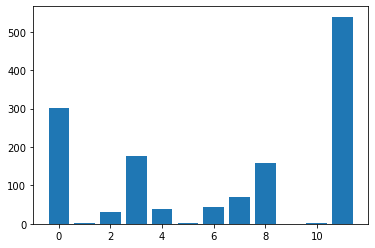

In [134]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [135]:
import statsmodels.api as sm
import scipy.stats as stats

In [152]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
stats1=result.summary()
stats1

Optimization terminated successfully.
         Current function value: 0.506697
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             RATEHEALTH   No. Observations:                 6131
Model:                          Logit   Df Residuals:                     6119
Method:                           MLE   Df Model:                           11
Date:                Tue, 22 Mar 2022   Pseudo R-squ.:                  0.1661
Time:                        17:49:59   Log-Likelihood:                -3106.6
converged:                       True   LL-Null:                       -3725.3
Covariance Type:            nonrobust   LLR p-value:                1.407e-258
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
COVIDCONCERN       0.0620      0.010      6.233      0.000       0.043       0.082
GENDER             0.0236      0.068      0.348      0.728      -0.109       0.157
MARRIAGE           0.1454      0.066      2.219      0.027       0.017       0.274
DEPRESSION        -0.5497      0.071     -7.704      0.000      -0.690      -0.410
EXERCISE           0.9540      0.090     10.598      0.000       0.778       1.130
AGE_BINS           0.1059      0.049      2.179      0.029       0.011       0.201
COLLEGE            0.8479      0.079     10.790      0.000       0.694       1.002
CHRONIC           -1.1748      0.098    -11.958      0.000      -1.367      -0.982
EMPLOYMENT_1.0     0.5700      0.155      3.688      0.000       0.267       0.873
EMPLOYMENT_2.0     0.0180      0.173      0.104      0.917      -0.321       0.357
EMPLOYMENT_3.0     0.1616      0.163      0.989      0.323      -0.159       0.482
EMPLOYMENT_4.0    -1.0592      0.161     -6.571      0.000      -1.375      -0.743
==================================================================================
"""

In [156]:
#Odds Ratio
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                      5%       95%  Odds Ratio
COVIDCONCERN    1.043454  1.084975    1.064012
GENDER          0.896411  1.169506    1.023893
MARRIAGE        1.017098  1.315115    1.156547
DEPRESSION      0.501812  0.663758    0.577132
EXERCISE        2.176203  3.096994    2.596091
AGE_BINS        1.010711  1.222751    1.111687
COLLEGE         2.001394  2.723336    2.334624
CHRONIC         0.254787  0.374475    0.308888
EMPLOYMENT_1.0  1.306099  2.393745    1.768182
EMPLOYMENT_2.0  0.725601  1.428582    1.018126
EMPLOYMENT_3.0  0.853200  1.619361    1.175431
EMPLOYMENT_4.0  0.252795  0.475536    0.346718


In [137]:
model1 = LogisticRegression().fit(X_train, y_train)
preds = model1.predict(X_test)

In [138]:
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

Intercept: 
 [-0.06049208]
Coefficients: 
 [[ 0.06211985  0.02377615  0.14578099 -0.54848731  0.94692978  0.1045814
   0.84253615 -1.16439262  0.63042618  0.07912758  0.22307348 -0.99218897]]


In [139]:
#Calculate odds ratio estimates
import numpy as np
oddsratio = np.exp(model1.coef_)

In [140]:
oddsratio = pd.DataFrame(oddsratio)

In [141]:
#Change Column Name if necessary
oddsratio.rename({0:'COVIDCONCERN',1: 'GENDER',2: 'MARRIAGE',3: 'DEPRESSION',4: 'EXERCISE',
       5:'AGE_BINS', 6:'COLLEGE',7: 'CHRONIC',8: 'EMPLOYMENT_1.0',9: 'EMPLOYMENT_2.0',10: 'EMPLOYMENT_3.0',
       11:'EMPLOYMENT_4.0'}, axis=1, inplace=True)

In [142]:
oddsratio.T

,0
COVIDCONCERN,1.064090
GENDER,1.024061
MARRIAGE,1.156943
DEPRESSION,0.577823
EXERCISE,2.577783
AGE_BINS,1.110246
COLLEGE,2.322249
CHRONIC,0.312112
EMPLOYMENT_1.0,1.878411
EMPLOYMENT_2.0,1.082342


In [143]:
confusion_matrix(y_test, preds)

array([[ 208,  398],
       [ 112, 1326]], dtype=int64)

In [144]:
confmtrx = np.array(confusion_matrix(y_test, preds))

In [145]:
pd.DataFrame(confmtrx, index=['Bad','Good'],
columns=['predicted_Bad','predicted_Good'])

,predicted_Bad,predicted_Good
Bad,208,398
Good,112,1326


In [146]:
print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

Accuracy Score: 0.7504892367906066


In [147]:
class_report=classification_report(y_test, preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.65      0.34      0.45       606
           1       0.77      0.92      0.84      1438

    accuracy                           0.75      2044
   macro avg       0.71      0.63      0.64      2044
weighted avg       0.73      0.75      0.72      2044



In [148]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Bad', 'Good']); ax.yaxis.set_ticklabels(['Bad','Good'])

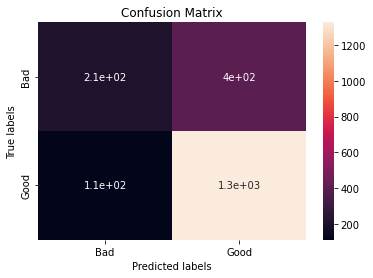

In [149]:
yhat = model1.predict(X_test)
plot_confusion_matrix(y_test,yhat)

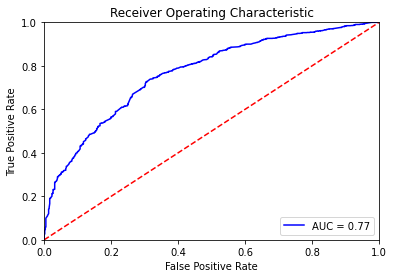

In [150]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()